In [ ]:
def build_model():
    # input_dim是输入的train_x的最后一个维度，train_x的维度为(n_samples, time_steps, input_dim)
    model = Sequential()
    model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
    print(model.layers)
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(output_dim=1))
    model.add(Activation('linear'))

    model.compile(loss='mse', optimizer='rmsprop')
    return model


def train_model(train_x, train_y, test_x, test_y):
    model = build_model()

    try:
        model.fit(train_x, train_y, batch_size=512, nb_epoch=30, validation_split=0.1)
        predict = model.predict(test_x)
        predict = np.reshape(predict, (predict.size, ))
    except KeyboardInterrupt:
        print(predict)
        print(test_y)
    print(predict)
    print(test_y)
    try:
        fig = plt.figure(1)
        plt.plot(predict, 'r:')
        plt.plot(test_y, 'g-')
        plt.legend(['predict', 'true'])
    except Exception as e:
        print(e)
    return predict, test_y


if __name__ == '__main__':
    train_x, train_y, test_x, test_y, scaler = load_data('international-airline-passengers.csv')
    train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
    test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
    predict_y, test_y = train_model(train_x, train_y, test_x, test_y)
    predict_y = scaler.inverse_transform([[i] for i in predict_y])
    test_y = scaler.inverse_transform(test_y)
    fig2 = plt.figure(2)
    plt.plot(predict_y, 'g:')
    plt.plot(test_y, 'r-')
    plt.show()

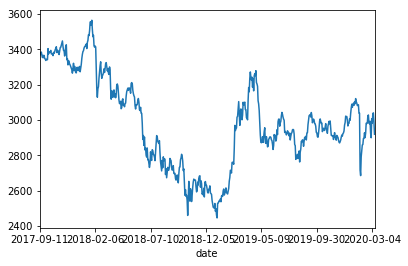

In [11]:
import tushare as ts
import matplotlib.pyplot as plt
data=ts.get_hist_data('sh',ktype='d')
data_all=data.open
data_all=data_all.sort_index(axis=0)
#print(data_all)
data_all.plot()
plt.show()

    

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation


def load_data(sequence_length=10, split=0.8):
    
    scaler = MinMaxScaler()
    data_all = scaler.fit_transform(data_all)
    data_open = []
    for i in range(len(data_all) - sequence_length - 1):
        data_open.append(data_all[i: i + sequence_length + 1])
    
    reshaped_data = np.array(data).astype('float64')
    np.random.shuffle(reshaped_data)
    # 对x进行统一归一化，而y则不归一化
    x = reshaped_data[:, :-1]
    y = reshaped_data[:, -1]
    
    split_boundary = int(reshaped_data.shape[0] * split)
    train_x = x[: split_boundary]
    test_x = x[split_boundary:]

    train_y = y[: split_boundary]
    test_y = y[split_boundary:]

    return train_x, train_y, test_x, test_y, scaler




Using TensorFlow backend.


In [22]:
arr=[[1,2,3],[4,5,6],[7,8,9]]
arr2=np.array(arr)
print(arr2[:,-1])
print(arr2[:,:-1])

[3 6 9]
[[1 2]
 [4 5]
 [7 8]]
